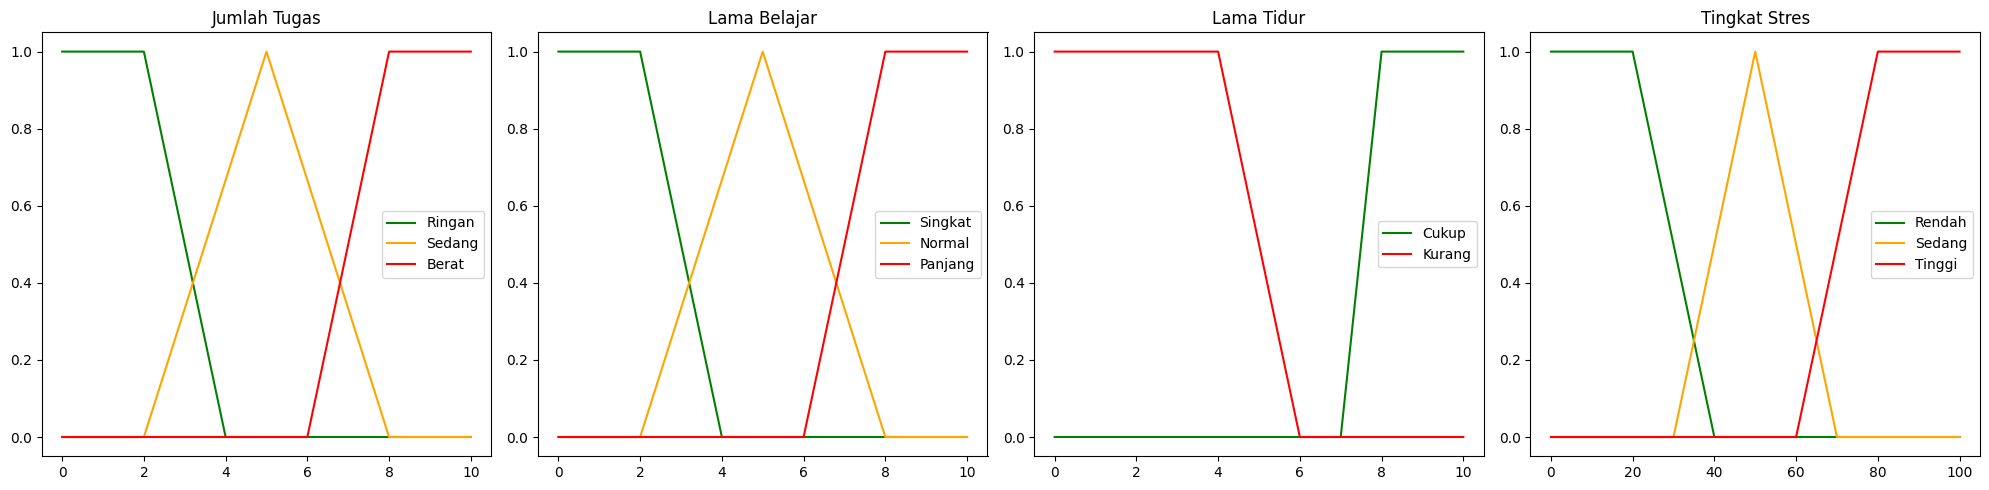

Prediksi tingkat stres: 80.00%


In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Domain variabel
x_tugas = np.arange(0, 11, 1)  # Jumlah tugas: 0 - 10
x_belajar = np.arange(0, 11, 1)  # Lama belajar (jam/hari): 0 - 10
x_tidur = np.arange(0, 11, 1)  # Lama tidur (jam/hari): 0 - 10
x_stres = np.arange(0, 101, 1)  # Tingkat stres: 0% - 100%

# Fuzzifikasi jumlah tugas
tugas_ringan = fuzz.trapmf(x_tugas, [0, 0, 2, 4])
tugas_sedang = fuzz.trimf(x_tugas, [2, 5, 8])
tugas_berat = fuzz.trapmf(x_tugas, [6, 8, 10, 10])

# Fuzzifikasi lama belajar
belajar_singkat = fuzz.trapmf(x_belajar, [0, 0, 2, 4])
belajar_normal = fuzz.trimf(x_belajar, [2, 5, 8])
belajar_panjang = fuzz.trapmf(x_belajar, [6, 8, 10, 10])

# Fuzzifikasi lama tidur
tidur_cukup = fuzz.trapmf(x_tidur, [7, 8, 10, 10])
tidur_kurang = fuzz.trapmf(x_tidur, [0, 0, 4, 6])

# Fuzzifikasi tingkat stres
stres_rendah = fuzz.trapmf(x_stres, [0, 0, 20, 40])
stres_sedang = fuzz.trimf(x_stres, [30, 50, 70])
stres_tinggi = fuzz.trapmf(x_stres, [60, 80, 100, 100])

# Visualisasi variabel
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(x_tugas, tugas_ringan, label='Ringan', color='g')
axs[0].plot(x_tugas, tugas_sedang, label='Sedang', color='orange')
axs[0].plot(x_tugas, tugas_berat, label='Berat', color='r')
axs[0].set_title('Jumlah Tugas')
axs[0].legend()

axs[1].plot(x_belajar, belajar_singkat, label='Singkat', color='g')
axs[1].plot(x_belajar, belajar_normal, label='Normal', color='orange')
axs[1].plot(x_belajar, belajar_panjang, label='Panjang', color='r')
axs[1].set_title('Lama Belajar')
axs[1].legend()

axs[2].plot(x_tidur, tidur_cukup, label='Cukup', color='g')
axs[2].plot(x_tidur, tidur_kurang, label='Kurang', color='r')
axs[2].set_title('Lama Tidur')
axs[2].legend()

axs[3].plot(x_stres, stres_rendah, label='Rendah', color='g')
axs[3].plot(x_stres, stres_sedang, label='Sedang', color='orange')
axs[3].plot(x_stres, stres_tinggi, label='Tinggi', color='r')
axs[3].set_title('Tingkat Stres')
axs[3].legend()

plt.tight_layout()
plt.show()

# Fungsi inferensi defuzzifikasi
def prediksi_stres(tugas, belajar, tidur):
    # Fuzzifikasi input
    tugas_r = fuzz.interp_membership(x_tugas, tugas_ringan, tugas)
    tugas_s = fuzz.interp_membership(x_tugas, tugas_sedang, tugas)
    tugas_b = fuzz.interp_membership(x_tugas, tugas_berat, tugas)

    belajar_s = fuzz.interp_membership(x_belajar, belajar_singkat, belajar)
    belajar_n = fuzz.interp_membership(x_belajar, belajar_normal, belajar)
    belajar_p = fuzz.interp_membership(x_belajar, belajar_panjang, belajar)

    tidur_c = fuzz.interp_membership(x_tidur, tidur_cukup, tidur)
    tidur_k = fuzz.interp_membership(x_tidur, tidur_kurang, tidur)

    # Aturan Fuzzy
    # Jika Tugas Berat ∩ Tidur Kurang, maka Stres Tinggi
    r1 = np.fmin(tugas_b, tidur_k)
    z1 = 80 * r1

    # Jika Tugas Sedang ∩ Belajar Panjang, maka Stres Sedang
    r2 = np.fmin(tugas_s, belajar_p)
    z2 = 60 * r2

    # Jika Tugas Ringan ∩ Tidur Cukup, maka Stres Rendah
    r3 = np.fmin(tugas_r, tidur_c)
    z3 = 20 * r3

    # Kombinasi lain (Tambahkan lebih banyak aturan sesuai kebutuhan)

    # Agregasi Output
    numerator = z1 + z2 + z3
    denominator = r1 + r2 + r3

    if denominator == 0:
        return 0  # Mencegah pembagian nol
    return numerator / denominator

# Contoh kasus
tugas = 8
belajar = 6
tidur = 5
hasil_stres = prediksi_stres(tugas, belajar, tidur)
print(f"Prediksi tingkat stres: {hasil_stres:.2f}%")
